# Overlaying differentially rotated gridlines

- https://docs.sunpy.org/en/stable/generated/gallery/differential_rotation/differentially_rotated_gridlines.html

How to overlay differentially rotated gridlines on a Map.

The example uses the `sunpy.coordinates.metaframes.RotatedSunFrame` coordinate
metaframe in `sunpy.coordinates` to overlay differentially rotated gridlines on
a Map.

In [ ]:
import matplotlib.pyplot as plt

import astropy.units as u

import sunpy.map
from sunpy.coordinates import HeliographicStonyhurst, RotatedSunFrame
from sunpy.data.sample import AIA_171_IMAGE

Let's use an AIA observation, and plot lines of constant longitude in
heliographic Stonyhurst. We'll plot the normal lines (prior to applying
differential rotation) in white and the differentially rotated lines in
blue.

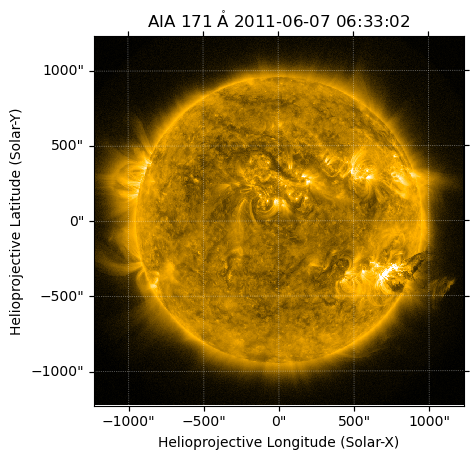

In [ ]:
aiamap = sunpy.map.Map(AIA_171_IMAGE)
fig = plt.figure()
ax = fig.add_subplot(projection=aiamap)
aiamap.plot(axes=ax, clip_interval=(1., 99.95)*u.percent)
plt.show()

Lines of constant longitude prior to differential rotation

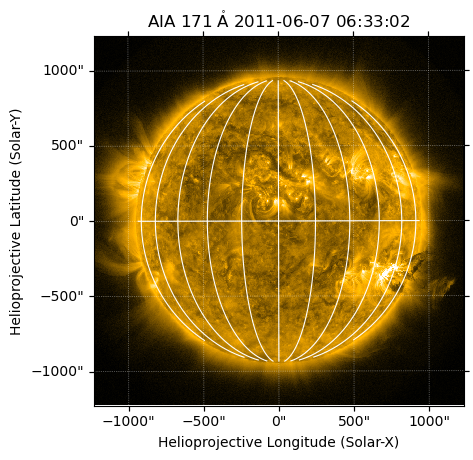

In [ ]:
aiamap = sunpy.map.Map(AIA_171_IMAGE)
fig = plt.figure()
ax = fig.add_subplot(projection=aiamap)
aiamap.plot(axes=ax, clip_interval=(1., 99.95)*u.percent)

overlay1 = ax.get_coords_overlay('heliographic_stonyhurst')
overlay1[0].set_ticks(spacing=15. * u.deg)
overlay1[1].set_ticks(spacing=90. * u.deg)
overlay1.grid(ls='-', color='white')

plt.show()

Differentially rotating the lines of constant longitude by 27 days
Be aware that the differentially rotated lines are plotted in the
original coordinate frame, so it doesn't account for any motion of the
observer over 27 days.

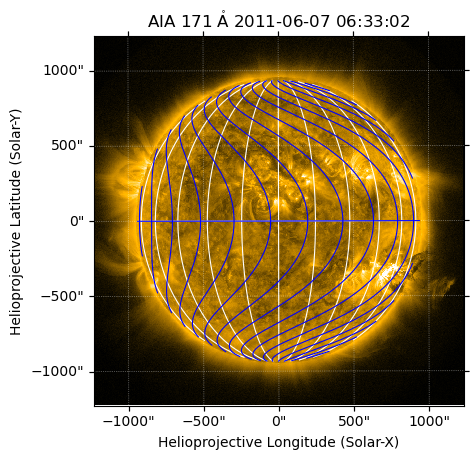

In [ ]:
aiamap = sunpy.map.Map(AIA_171_IMAGE)
fig = plt.figure()
ax = fig.add_subplot(projection=aiamap)
aiamap.plot(axes=ax, clip_interval=(1., 99.95)*u.percent)

overlay1 = ax.get_coords_overlay('heliographic_stonyhurst')
overlay1[0].set_ticks(spacing=15. * u.deg)
overlay1[1].set_ticks(spacing=90. * u.deg)
overlay1.grid(ls='-', color='white')

rs_hgs = RotatedSunFrame(base=HeliographicStonyhurst(obstime=aiamap.date),
                         duration=27*u.day)
overlay2 = ax.get_coords_overlay(rs_hgs)
overlay2[0].set_ticks(spacing=15. * u.deg)
overlay2[1].set_ticks(spacing=90. * u.deg)
overlay2.grid(ls='-', color='blue')

plt.show()